In [25]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
from matplotlib import gridspec

# plot the visuals in ipython
%matplotlib inline


In [26]:
probs=[
# 	"koza_01",
# 	"koza_02",
# 	"koza_03",
# 	"lipson_01",
# 	"lipson_02",
# 	"lipson_03",

# 	"nguyen_01",
	"nguyen_02",
	"nguyen_03",
	"nguyen_04",
	"nguyen_05",
	"nguyen_06",
# 	"nguyen_07",
# 	"nguyen_08",
    
	"nguyen_09",
# 	"nguyen_10",
# 	"nguyen_11",
	"nguyen_12",

# 	"korns_01",
# 	"korns_02",
	"korns_03",
# 	"korns_04",
# 	"korns_05",
# 	"korns_06",
# 	"korns_07",
# 	"korns_08",
# 	"korns_09",
# 	"korns_10",
# 	"korns_11",
# 	"korns_12",
# 	"korns_13",
# 	"korns_14",
# 	"korns_15"
]

settings = [
    "A",
    "B",
    "C",
    "D"
]

titles = {
    "A": "No expand, No shrink",
    "B": "Yes expand, No shrink",
    "C": "No expand, Yes shrink",
    "D": "Yes expand, Yes shrink",
}

In [27]:
directory = "/Users/tony/pypge/experiments/output/expand_ops/"

def process_setting_dir(s):
    cdata = {}
    for p in probs:
        prob_out_dir = directory + "config_explicit_plain_" + s + ".yml/clean/" + p + "/out/"
        cdf = pd.read_csv(prob_out_dir + "pge_errs.log", delim_whitespace=True)
        cdata[p] = cdf

    pdf = pd.Panel(cdata)
    print s + " loaded"
    return pdf
    
sdata = {}
for s in settings:
    sdata[s] = process_setting_dir(s)
    


A loaded
B loaded
C loaded
D loaded


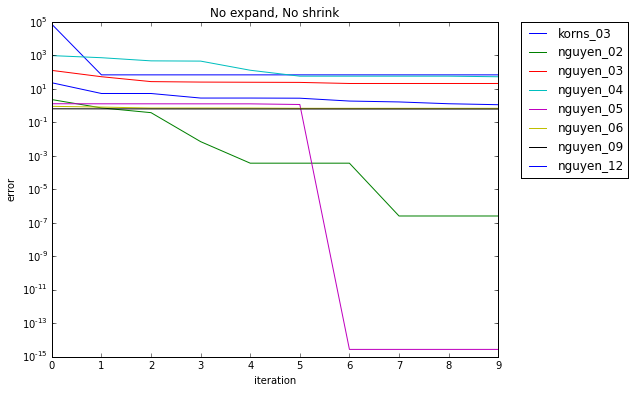

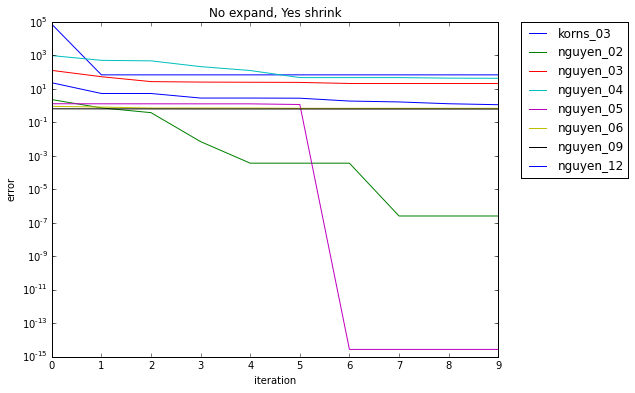

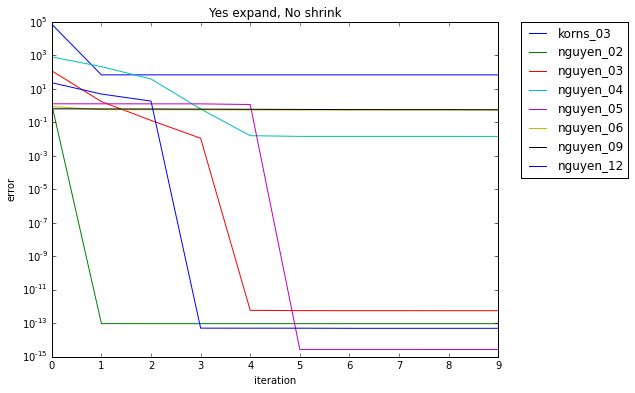

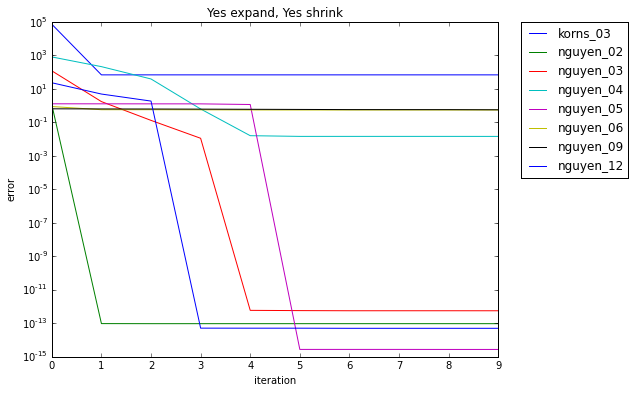

done


In [29]:
ys1 = sdata["A"].minor_xs("best_err")
ys2 = sdata["B"].minor_xs("best_err")
ys3 = sdata["C"].minor_xs("best_err")
ys4 = sdata["D"].minor_xs("best_err")


def graphit(YS, filename, title):
    fig = plt.figure()
    fig.set_size_inches(8,6)
    gs = gridspec.GridSpec(2,1)
    ax1 = fig.add_subplot(gs[:,0])
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('error')
    ax1.set_title(title)
    ax1.set_yscale("log")
    YS.plot(ax=ax1)
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig("images/"+filename+".png", dpi=200, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

graphit(ys1,"A",titles["A"])
graphit(ys3,"C",titles["C"])
graphit(ys2,"B",titles["B"])
graphit(ys4,"D",titles["D"])


print "done"
